In [63]:

import numpy as np
from torch import nn
from PIL import Image, ImageOps
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.image as mpimg

import os
from keras.applications.vgg16 import VGG16
import kagglehub



In [64]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

idx1_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(idx1_dataset, batch_size=64, shuffle=True)

idx1_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
loaderTest = DataLoader(idx1_test, batch_size=64, shuffle=True)


for X,y in loader:
    print(X.shape)
    print(y.shape, y.dtype)
    break



torch.Size([64, 1, 28, 28])
torch.Size([64]) torch.int64


In [65]:
device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

print(f"device: {device}")

device: mps


In [66]:
class NueralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.network = nn.Sequential(nn.Linear(28*28, 512), 
                                     nn.ReLU(), 
                                     nn.Linear(512, 512),
                                     nn.ReLU(),
                                     nn.Linear(512,10))

    def forward(self, x):
        x = self.flatten(x)
        logits = self.network(x)
        return logits


class ConvolutionalNueralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=16, kernel_size=3, padding = 1, stride = 1)
        self.conv2 = nn.Conv2d(in_channels=)

        
        

In [67]:
model = NueralNetwork().to(device)

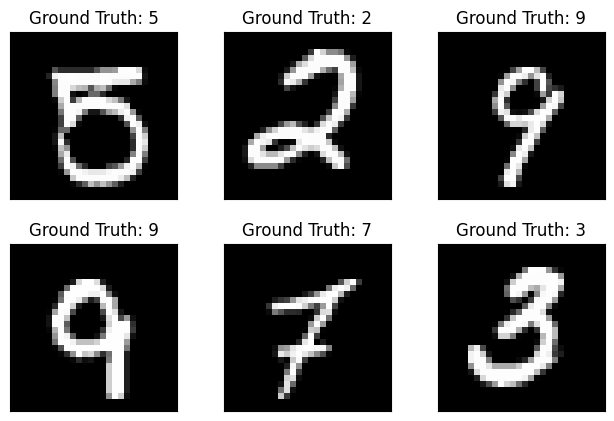

In [68]:
examples = enumerate(loaderTest)
batch_idx, (example_data, example_targets) = next(examples)

print(examples)

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap="gray", interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [69]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [76]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [77]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [78]:
epochs = 5 
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loader, model, loss_fn, optimizer)
    test(loaderTest, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.293512  [   64/60000]
loss: 2.272576  [ 6464/60000]
loss: 2.212132  [12864/60000]
loss: 2.171756  [19264/60000]
loss: 2.124242  [25664/60000]
loss: 2.091428  [32064/60000]
loss: 2.002129  [38464/60000]
loss: 1.989480  [44864/60000]
loss: 1.907143  [51264/60000]
loss: 1.805509  [57664/60000]
Test Error: 
 Accuracy: 73.3%, Avg loss: 1.773039 

Epoch 2
-------------------------------
loss: 1.761994  [   64/60000]
loss: 1.708501  [ 6464/60000]
loss: 1.577314  [12864/60000]
loss: 1.361848  [19264/60000]
loss: 1.406408  [25664/60000]
loss: 1.387334  [32064/60000]
loss: 1.261345  [38464/60000]
loss: 1.095897  [44864/60000]
loss: 1.028467  [51264/60000]
loss: 0.936825  [57664/60000]
Test Error: 
 Accuracy: 82.1%, Avg loss: 0.955467 

Epoch 3
-------------------------------
loss: 1.021145  [   64/60000]
loss: 1.041398  [ 6464/60000]
loss: 0.956907  [12864/60000]
loss: 0.876271  [19264/60000]
loss: 0.862506  [25664/60000]
loss: 0.823978  [32064/600